# Regression Models on Real Estate Data

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

I will be using a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Load the data and view the first few rows.

In [101]:
import pandas as pd

# load the training dataset
house_data = pd.read_csv('real_estate.csv')
house_data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

In this dataset, **price_per_unit** represents the label I want to train my model to predict. The other columns are potential features. 


## Explore the Dataset

First I will explore and prepare the data. I will look at central tendency measures, distribution of the data, determine if there are any outliers and/or missing values that need to be handled, and look for correlations between variables. After cleaning the dataset and identifying predictive features that will help predict the **price_per_unit** label, I will train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

In [102]:
# Check for missing values: 
print("There are ", house_data.isnull().sum().sum(), "missing values in the dataset")

# Descriptive statistics for the numeric features in the dataset:
numeric_features = ['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']
print(house_data[numeric_features + ['price_per_unit']].describe())


# Decode the transaction_date column by separating the year and determining the month:
house_data['year'] = house_data['transaction_date'].astype(str).str[0:4]
house_data['month'] = ((house_data['transaction_date'] - house_data['year'].astype(int)) * 12).astype(int)


# Review clean dataset
house_data.head(5)

There are  0 missing values in the dataset
        house_age  transit_distance  local_convenience_stores    latitude  \
count  414.000000        414.000000                414.000000  414.000000   
mean    17.712560       1083.885689                  4.094203   24.969030   
std     11.392485       1262.109595                  2.945562    0.012410   
min      0.000000         23.382840                  0.000000   24.932070   
25%      9.025000        289.324800                  1.000000   24.963000   
50%     16.100000        492.231300                  4.000000   24.971100   
75%     28.150000       1454.279000                  6.000000   24.977455   
max     43.800000       6488.021000                 10.000000   25.014590   

        longitude  price_per_unit  
count  414.000000      414.000000  
mean   121.533361       37.980193  
std      0.015347       13.606488  
min    121.473530        7.600000  
25%    121.528085       27.700000  
50%    121.538630       38.450000  
75%    121.

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,year,month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9


The descriptive statistics tell us some compelling information about the distribution of the real estate data, including the total number of observations (there are 414 records), the mean, standard deviation, min/max and quartile values. From this, we see that the mean price per unit is approximately 37.98 per unit, while the standard deviation is relatively large, which indicates a lot of variance in the price per unit. By plotting the distribution of the data and looking at some scatter plots, we can look at the relationships between features, and see what contributes to this variance.  

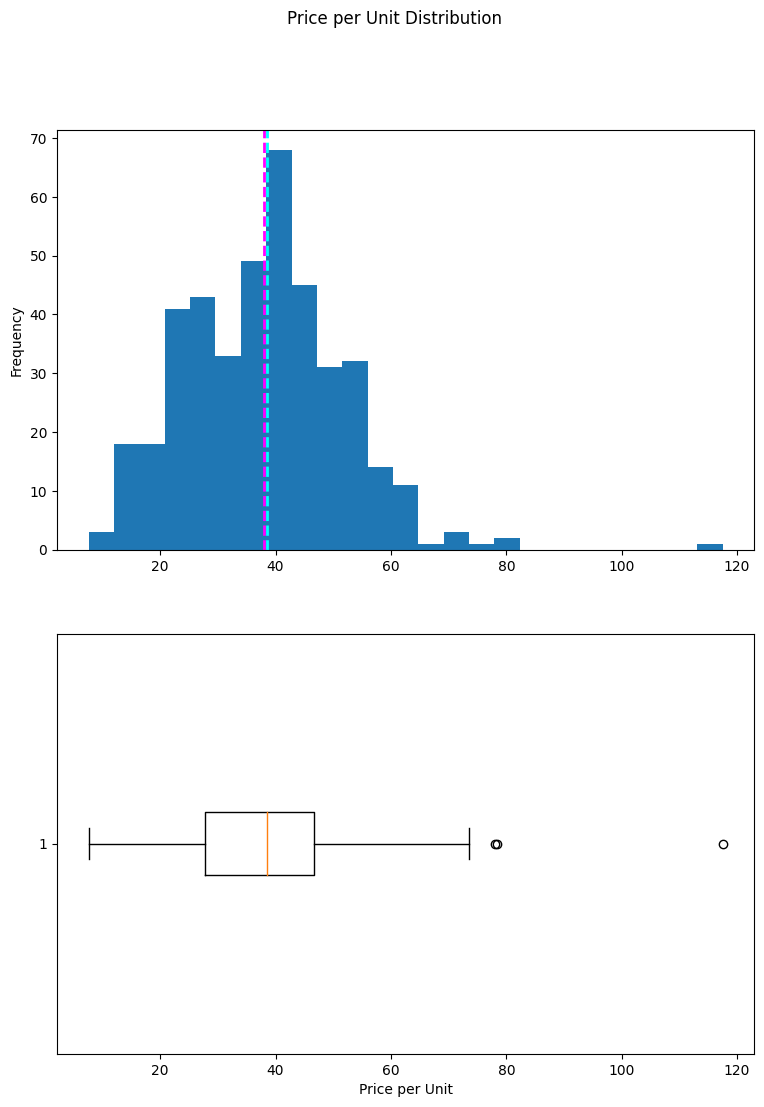

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# make sure the plots are displayed inline
%matplotlib inline

# Y-axis (label)
label = house_data['price_per_unit']

# Create a figure with 2 subplots: one for a histogram, and one for a boxplot
fig, ax = plt.subplots(2, 1, figsize = (9, 12))

# Plot the histogram
ax[0].hist(label, bins=25)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price per Unit')

# Add a title to the figure
fig.suptitle('Price per Unit Distribution')


plt.show()

The plots show that the price per unit ranges from 5 to around 80. However, this includes somme outliers on the upper end of the range. The mean and median are relatively close together and are skewed towards the lower end of the range. From the box plot, we can see that 50% of the data resides between 25 and 45. After excluding outliers, the histogram shows a roughly normal distribution of data around the mean. 

Let's look at some scatter plots to see if these features have any correlations with the label we want to predict. 

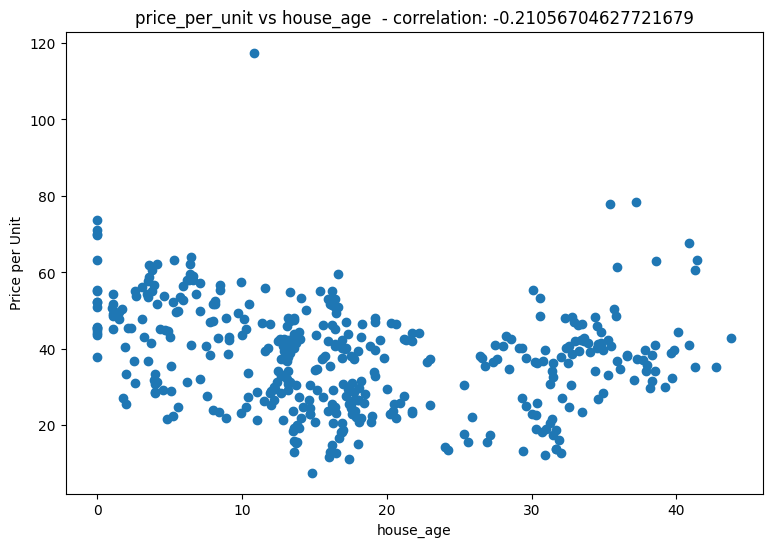

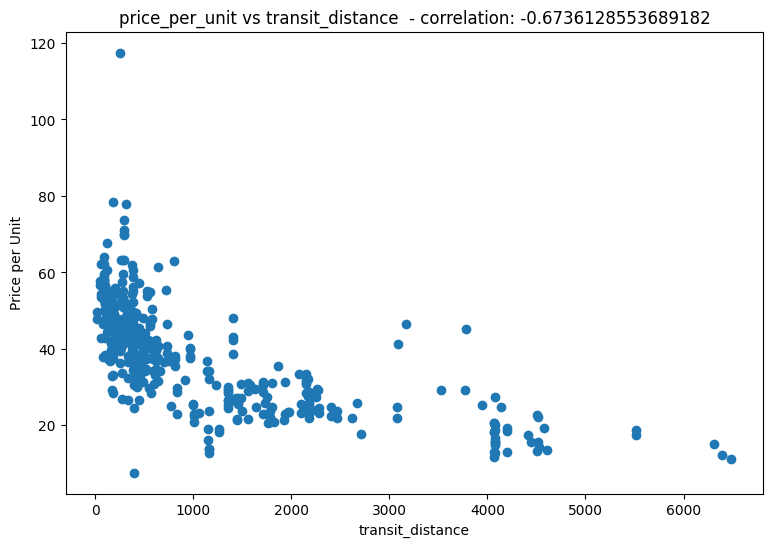

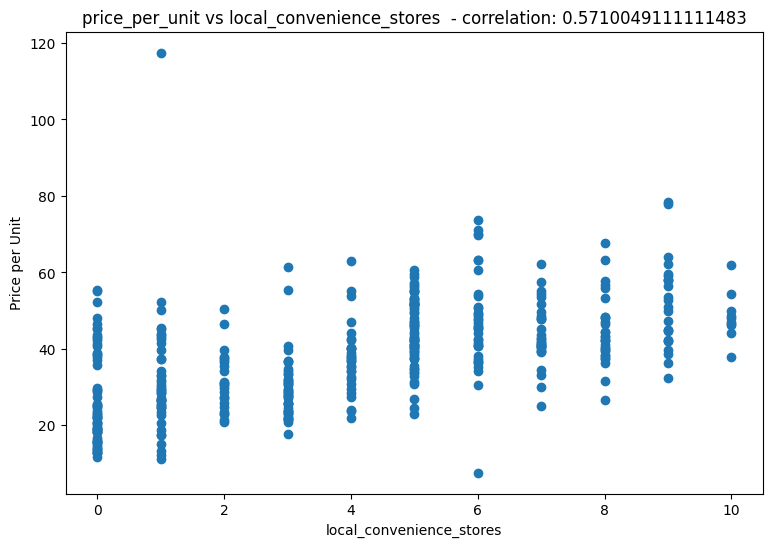

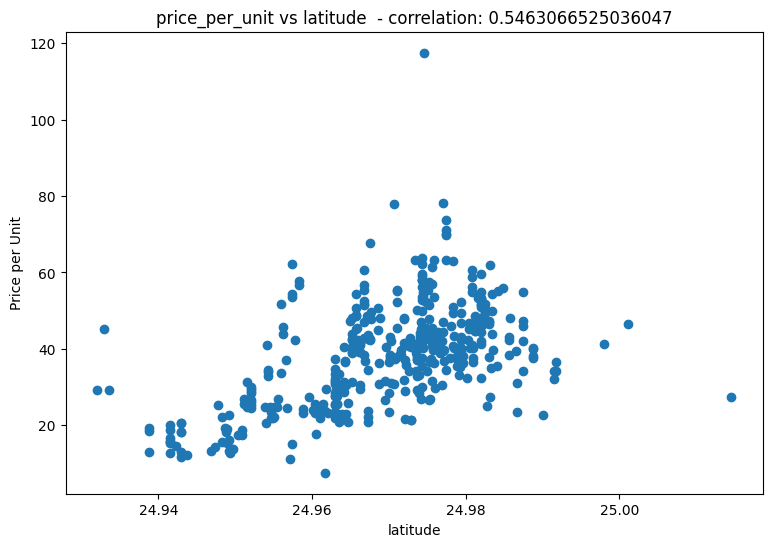

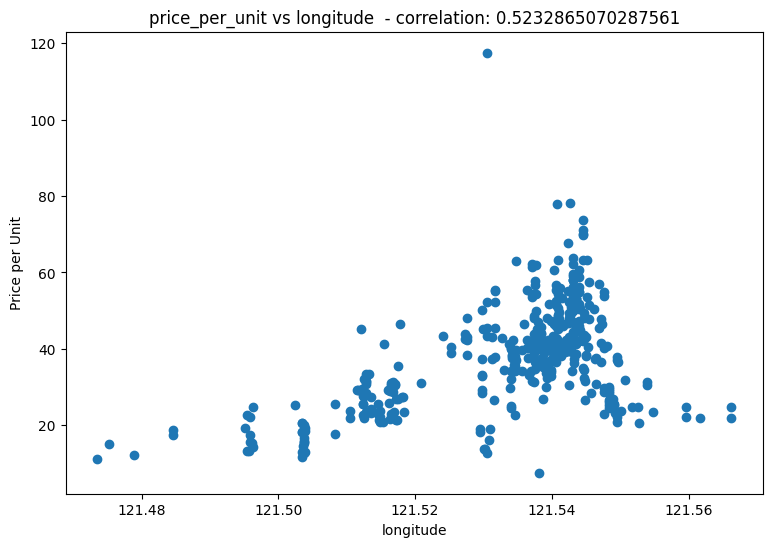

In [104]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = house_data[col]
    label = house_data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price per Unit')
    ax.set_title('price_per_unit vs ' + col + '  - correlation: ' + str(correlation))
plt.show()

The results are not conclusive, but they do give us a good understanding of which features have a higher correlation with the **price_per_unit**. There appears to be a slight positive correlation between **price_per_unit** and the following features: **local_convenience_stores**, **latitude**, and **longitude**. In other words, as the number of convenience stores within walking distance to a property increases, the price per unit tends to increase as well. Similarly, as the location of a house appears to impact cost. We can also see a relatively strong negative correlation of -0.67 between **transit_distance** and **price_per_unit**. Thus houses that are farther from a light rail station tend to be priced higher.

Lastly, let's look at correlations between categorical features in our dataset and the label.  

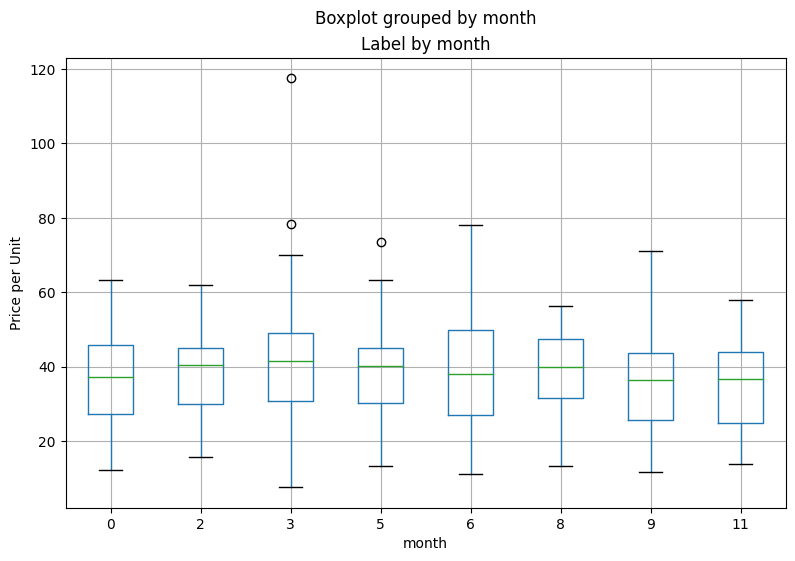

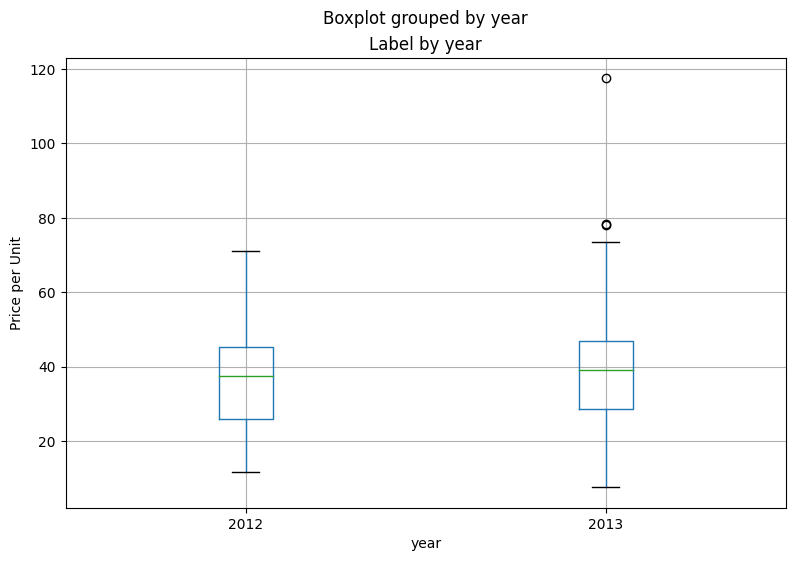

In [105]:
# plot a boxplot for the label by each categorical feature
categorical_features = ['month', 'year']
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    house_data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price per Unit")
plt.show()

While the median price trend seems to have remained steady over the months, it increased between 2012 and 2013. There also appears to be a wave-like pattern in the housing market from month to month, with the range being the largest during the summer. We now have a pretty good understanding of the relationships between our features and the label we want to predict. Now let's train a linear regression model to predict the **price_per_unit** based on the features we have identified. 

## Train a Regression Model

In [106]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X, y = house_data[['transaction_date','house_age','transit_distance', 'local_convenience_stores','latitude','longitude']].values, house_data['price_per_unit'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')


# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Features:
[[2012.917     32.        84.87882   10.        24.98298  121.54024]
 [2012.917     19.5      306.5947     9.        24.98034  121.53951]
 [2013.583     13.3      561.9845     5.        24.98746  121.54391]
 [2013.5       13.3      561.9845     5.        24.98746  121.54391]
 [2012.833      5.       390.5684     5.        24.97937  121.54245]
 [2012.667      7.1     2175.03       3.        24.96305  121.51254]
 [2012.667     34.5      623.4731     7.        24.97933  121.53642]
 [2013.417     20.3      287.6025     6.        24.98042  121.54228]
 [2013.5       31.7     5512.038      1.        24.95095  121.48458]
 [2013.417     17.9     1783.18       3.        24.96731  121.51486]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]
Training Set: 289 rows
Test Set: 125 rows


In [107]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)


LinearRegression()


## Evaluate the Trained Model

Now it is time to use the test data that was held back to determine how well the model works on unseen data. This is important because if the model performs better on the training data than on the test data, it may be overfitted to the training data. Conversely, if the model performs better on the test data then there is a chance that it is underfit. We can try parameter tuning and test different types of regression algorithms to find the one that works best for this dataset. 

Predicted labels:  [41. 13. 42. 13. 43. 40. 41. 34. 50. 46.]
Actual labels   :  [45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1]


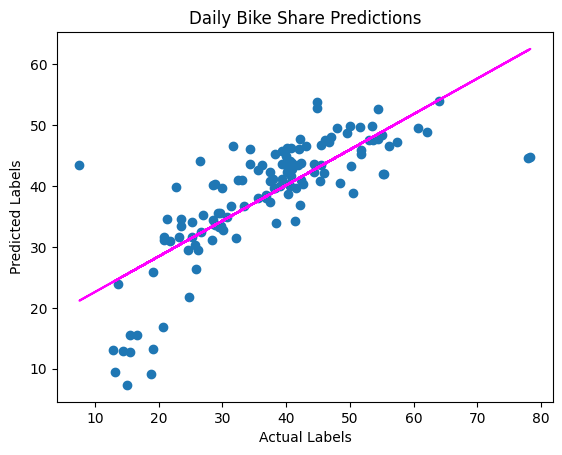

In [108]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

# Plot the predicted values against the expected values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Comparing the predicted values with the actual labels helps us evaluate the data. For this model, we want to minimize the RMSE (root mean squared error) value. We can see from the scatterplot that there is some deviation from the magenta line representing the model's linear regression equation.

In [109]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

RMSE: 8.460574198749987
R2: 0.5799815654577722


The RMSE is relatively low, which indicates that this model is not performing poorly. However the R<sup>2</sup> value is only 0.5 which essentilly means that only about 50% of the variance between the predicted and actual label values can be explained by the model. If we can get this value to be closer to 1 without overfitting the model to the training data, we will have a more accurate regression model for predicting the **price_per_unit** on unseen values.

## Try Another Linear Algorithm

Let's try a **Lasso** algorithm by changing the estimator in the training code. 

Lasso() 

MSE: 78.56402072588622
RMSE: 8.863634735585974
R2: 0.5390090746378506


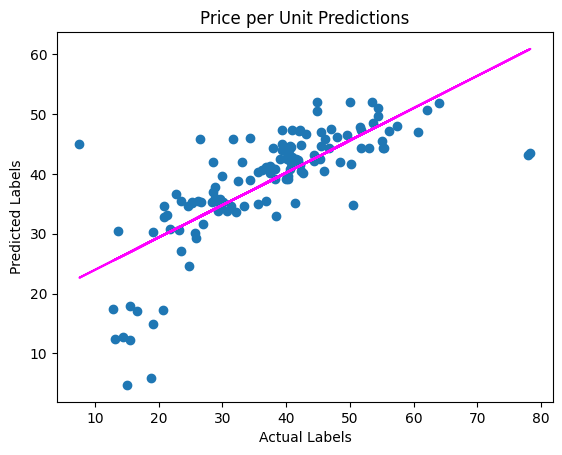

In [110]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per Unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Notice that using this alternative linear regression algorithm led to an increase in our RMSE value and a slight decrease in the R<sup>2</sup> value. This means that the **lasso** algorithm produces a model that performs does not perform as well as the linear regression algorithm we started with.

## Try and Decision Tree Algorithm

The tree-based approach to regression examines features in the dataset over a series of evaluations. This results in _branches_ based on a feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values. Let's train a decision tree to see if we can increase the model performance for predicting **price_per_unit** in our real estate data. After training the model, the following code will print a model definition as well as a text representation of the tree that was used to predict label values. 

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_2 <= 826.83
|   |--- feature_1 <= 11.70
|   |   |--- feature_5 <= 121.53
|   |   |   |--- value: [117.50]
|   |   |--- feature_5 >  121.53
|   |   |   |--- feature_4 <= 24.97
|   |   |   |   |--- feature_2 <= 130.53
|   |   |   |   |   |--- feature_0 <= 2012.79
|   |   |   |   |   |   |--- feature_1 <= 4.65
|   |   |   |   |   |   |   |--- value: [48.70]
|   |   |   |   |   |   |--- feature_1 >  4.65
|   |   |   |   |   |   |   |--- value: [42.70]
|   |   |   |   |   |--- feature_0 >  2012.79
|   |   |   |   |   |   |--- feature_3 <= 7.50
|   |   |   |   |   |   |   |--- feature_1 <= 8.40
|   |   |   |   |   |   |   |   |--- feature_1 <= 8.20
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 121.54
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 2012.88
|   |   |   |   |   |   |   |   |   |   |   |--- value: [54.40]
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  2012.88
|   |   |   |   |   |   |   |   |   |   |   |--- valu

Let's evaluate the tree-based model using test data to see how well it performs. 

MSE: 114.31110000000002
RMSE: 10.691636918638793
R2: 0.329255564044698


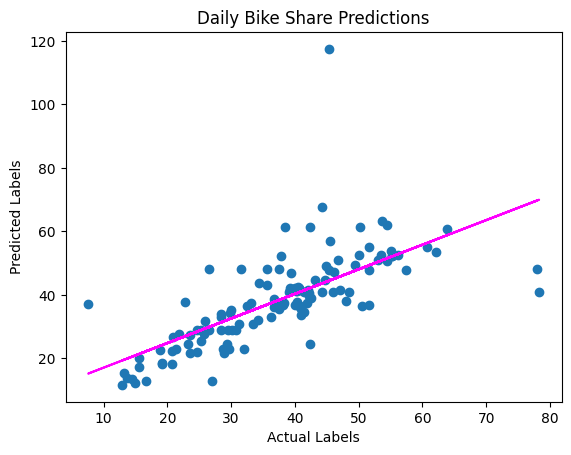

In [112]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Since thise RMSE is even higher than the lasso model and the coefficient of determination is significantly closer to zero, the simple linear regression algorithm is currently the best model for predicting **price_per_unit**. 

## Ensemble Algorithms

An ensemble algorithm works by combining multiple base estimators to produce an optimal model. The occurs via _bagging_ or _boosting_. Let's try a Random Forest model and a Gradient Boosting estimator.

RandomForestRegressor() 

MSE: 60.29525492541998
RMSE: 7.7650019269424515
R2: 0.6462049026233501


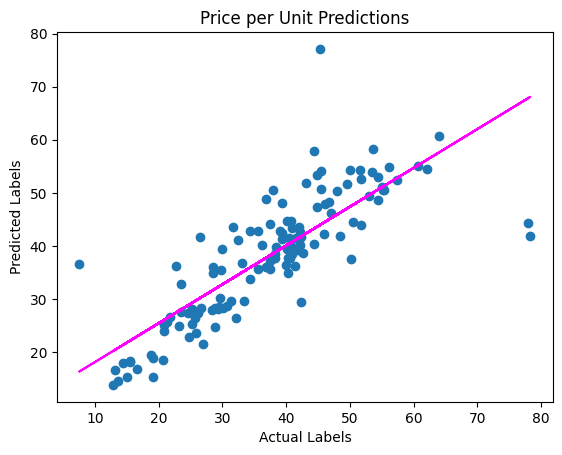

In [113]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per Unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 61.83044825188625
RMSE: 7.863233956323966
R2: 0.637196832699756


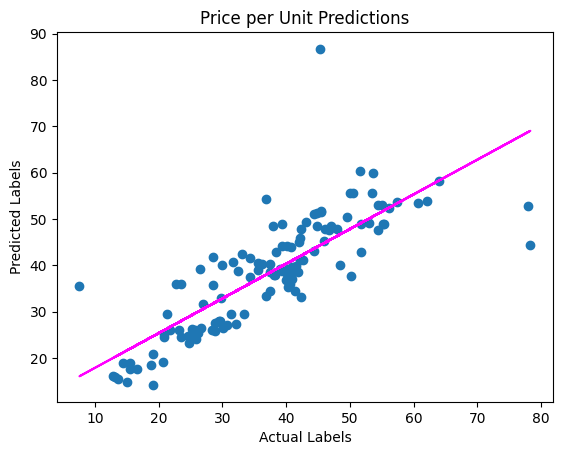

In [114]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per Unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Both of the ensemble algorithms resulted in an RMSE that is below 8, thus performing better than our original linear regression model. If we look closely, the random forest model RMSE was approximately 0.03 higher than the gradient boosting model. With an R<sup>2</sup> value of approximately 0.64, the gradient boosting model should be deployed for future price_per_unit predictions. 

# Summary

When the features are being used to predict the price per unit of a house,
- **transaction_date**
- **house_age** 
- **transit_distance** 
- **local_convenience_stores** 
- **latitude** 
- **longitude** 

an ensemble regression model with gradient boosting is the optimal choice. It is important to note that the latitude and longitude data for this project is located in Taiwan and would not be a very accurate model for predicting the price per unit of a house in a different location. Furthermore, while we noted both positive and negative correlations in our data between some of the features and the label, a machine learning algorithm cannot be used to conclude causation. Lastly, if this were to be deployed and used today, the model would need more updated information in order to provide price per unit predictions for the current housing market. 2012 and 2013 data can be great for predicting 2014 and maybe 2015 housing prices. However, as the year gets farther away from that used to train the model, the chances for error will increase because the algorithm is using outdated information.